In [1]:
import numpy as np
bohr_to_ang = 0.529177249 # Angstrom / Bohr

## SMODES Inputs

From [MnBi2Te4_hex.cif](../MnBi2Te4_hex.cif) lines 4-8:

```text
# Lattice parameters: a= 4.33360, b= 4.33360, c= 81.85200, alpha= 90.00000, beta= 90.00000, gamma= 120.00000
# Mn1 6a (0,0,0;0,0,mz), mz= 4.70000
# Bi1 12c (0,0,z;0,0,mz), z= 0.21245
# Te1 12c (0,0,z;0,0,mz), z= 0.06668
# Te2 12c (0,0,z;0,0,mz), z= 0.14703
```

This is the magnetic structure. For non-magnetic phonon calculations, we use the primitive cell without magnetic moments. We should divide $c$ by 2 to get the primitive cell lattice parameters. Also, the fractional $z$ coordinates in Wyckoff positions need to be divided by 2.

In [2]:
def make_SMODES_in(a, b, c, alpha, beta, gamma, Wyckoff_zs):
    lines = []
    lines.append("MnBi2Te4 (R-3m, hex axes): non-magnetic primitive cell")
    lines.append("166")
    lines.append(f"{a:.5f} {b:.5f} {c:.3f} {alpha} {beta} {gamma}")
    lines.append("4")
    lines.append("Mn a 0 0 0")
    lines.append(f"Bi c 0 0 {Wyckoff_zs[0]:.4f}")
    lines.append(f"Te1 c 0 0 {Wyckoff_zs[1]:.4f}")
    lines.append(f"Te2 c 0 0 {Wyckoff_zs[2]:.4f}")
    lines.append("2")
    lines.append("GM")
    lines.append("T")
    return "\n".join(lines)

In [3]:
a, b, c = 4.33360, 4.33360, 81.85200/2
alpha, beta, gamma = 90, 90, 120

In [4]:
Bi1_z = 0.21245
Te1_z = 0.06668
Te2_z = 0.14703

Wyckoff_zs = [Bi1_z*2, Te1_z*2, Te2_z*2]
print(Wyckoff_zs)

[0.4249, 0.13336, 0.29406]


In [5]:
print(make_SMODES_in(a, b, c, alpha, beta, gamma, Wyckoff_zs))

MnBi2Te4 (R-3m, hex axes): non-magnetic primitive cell
166
4.33360 4.33360 40.926 90 90 120
4
Mn a 0 0 0
Bi c 0 0 0.4249
Te1 c 0 0 0.1334
Te2 c 0 0 0.2941
2
GM
T


# Equilibrium Atomic Positions from Quantum ESPRESSO nscf Output

Below are the equilibrium atomic positions and lattice vectors for MnBi2Te4 in Angstroms. They are from the output of a Quantum ESPRESSO nscf calculation. They are both given in units of `alat`. The lattice vectors are for the *rhombohedral unit cell*. The lattice constant `a0` is also given by the nscf output.

In [6]:
a1 = np.array([0.079085,  -0.045660, 0.995822])
a2 = np.array([0.000000,  0.091319,  0.995822 ])
a3 = np.array([-0.079085, -0.045660, 0.995822])
A = np.array([a1, a2, a3])
a0 = 51.775623441 # in bohr, from 

In [7]:
print(f" lattice vectors in bohr: \n {a0 * A}\n")
print(f" lattice vectors in angstrom: \n {a0 * A * bohr_to_ang}")

 lattice vectors in bohr: 
 [[ 4.09467518 -2.36407497 51.55930489]
 [ 0.          4.72809816 51.55930489]
 [-4.09467518 -2.36407497 51.55930489]]

 lattice vectors in angstrom: 
 [[ 2.16680895 -1.25101469 27.28401112]
 [ 0.          2.50200198 27.28401112]
 [-2.16680895 -1.25101469 27.28401112]]


In [8]:
positions_alat = [
    ("Mn1", [0.0000000, 0.0000000, 0.0000000]),
    ("Mn2", [0.0000000, 0.0000000, 1.4937325]),
    ("Bi", [0.0000000, 0.0000000, 0.6346869]),
    ("Bi", [0.0000000, 0.0000000, 2.1284194]),
    ("Bi", [0.0000000, 0.0000000, 0.8590455]),
    ("Bi", [0.0000000, 0.0000000, 2.3527780]),
    ("Te", [0.0000000, 0.0000000, 0.1992042]),
    ("Te", [0.0000000, 0.0000000, 1.6929366]),
    ("Te", [0.0000000, 0.0000000, 1.2945283]),
    ("Te", [0.0000000, 0.0000000, 2.7882608]),
    ("Te", [0.0000000, 0.0000000, 0.4392470]),
    ("Te", [0.0000000, 0.0000000, 1.9329794]),
    ("Te", [0.0000000, 0.0000000, 1.0544855]),
    ("Te", [0.0000000, 0.0000000, 2.5482179]),
] # units of alat

In [9]:
positions_ang = [
    (atom, (np.array(coords) * a0 * bohr_to_ang).tolist())
    for atom, coords in positions_alat
]

In [10]:
positions_ang

[('Mn1', [0.0, 0.0, 0.0]),
 ('Mn2', [0.0, 0.0, 40.92600298085677]),
 ('Bi', [0.0, 0.0, 17.389457591175628]),
 ('Bi', [0.0, 0.0, 58.31546057203239]),
 ('Bi', [0.0, 0.0, 23.53654264983295]),
 ('Bi', [0.0, 0.0, 64.46254563068972]),
 ('Te', [0.0, 0.0, 5.45789268359575]),
 ('Te', [0.0, 0.0, 46.383892924604325]),
 ('Te', [0.0, 0.0, 35.46811029726103]),
 ('Te', [0.0, 0.0, 76.3941132781178]),
 ('Te', [0.0, 0.0, 12.034701013288789]),
 ('Te', [0.0, 0.0, 52.96070125429736]),
 ('Te', [0.0, 0.0, 28.891301967567987]),
 ('Te', [0.0, 0.0, 69.81730220857658])]

In [11]:
import re
def auto_id_positions(items):
    """
    items: [(species, [x,y,z]), ...]
    returns: [(id, species, [x,y,z])]
    
    - Keeps species exactly as given (e.g., "Mn1" stays "Mn1")
    - Adds numeric suffix only if species doesn't already end with digits
    """
    counts = {}
    out = []
    for sp, r in items:
        # Check if species already ends with digits
        if re.search(r"\d+$", sp):
            aid = sp
        else:
            counts[sp] = counts.get(sp, 0) + 1
            aid = f"{sp}{counts[sp]}"
        out.append((aid, sp, list(map(float, r))))
    return out

def make_qe_pos_block(positions, displacements=None, amp=0.0, unit="angstrom"):
    """
    positions: [(id, species, [x,y,z]), ...]
    displacements: {id: [dx,dy,dz]}  (optional)
                   or a callable  disp(id, species, pos) -> [dx,dy,dz]
    amp: scale factor for displacement
    """
    lines = [f"ATOMIC_POSITIONS {unit}"]
    use_callable = callable(displacements)
    for aid, sp, r in positions:
        r = np.array(r, float)
        if displacements is not None:
            if use_callable:
                d = np.array(displacements(aid, sp, r.copy()), float)
            else:
                d = np.array(displacements.get(aid, (0.0,0.0,0.0)), float)
            r = r + float(amp)*d
        lines.append(f" {sp:<3s} {r[0]:.12f} {r[1]:.12f} {r[2]:.12f}")
    return "\n".join(lines)

Use below for quantum ESPRESSO input files in equilibrium.

In [12]:
pos_id = auto_id_positions(positions_ang)
pos_id

[('Mn1', 'Mn1', [0.0, 0.0, 0.0]),
 ('Mn2', 'Mn2', [0.0, 0.0, 40.92600298085677]),
 ('Bi1', 'Bi', [0.0, 0.0, 17.389457591175628]),
 ('Bi2', 'Bi', [0.0, 0.0, 58.31546057203239]),
 ('Bi3', 'Bi', [0.0, 0.0, 23.53654264983295]),
 ('Bi4', 'Bi', [0.0, 0.0, 64.46254563068972]),
 ('Te1', 'Te', [0.0, 0.0, 5.45789268359575]),
 ('Te2', 'Te', [0.0, 0.0, 46.383892924604325]),
 ('Te3', 'Te', [0.0, 0.0, 35.46811029726103]),
 ('Te4', 'Te', [0.0, 0.0, 76.3941132781178]),
 ('Te5', 'Te', [0.0, 0.0, 12.034701013288789]),
 ('Te6', 'Te', [0.0, 0.0, 52.96070125429736]),
 ('Te7', 'Te', [0.0, 0.0, 28.891301967567987]),
 ('Te8', 'Te', [0.0, 0.0, 69.81730220857658])]

In [13]:
print(make_qe_pos_block(pos_id))

ATOMIC_POSITIONS angstrom
 Mn1 0.000000000000 0.000000000000 0.000000000000
 Mn2 0.000000000000 0.000000000000 40.926002980857
 Bi  0.000000000000 0.000000000000 17.389457591176
 Bi  0.000000000000 0.000000000000 58.315460572032
 Bi  0.000000000000 0.000000000000 23.536542649833
 Bi  0.000000000000 0.000000000000 64.462545630690
 Te  0.000000000000 0.000000000000 5.457892683596
 Te  0.000000000000 0.000000000000 46.383892924604
 Te  0.000000000000 0.000000000000 35.468110297261
 Te  0.000000000000 0.000000000000 76.394113278118
 Te  0.000000000000 0.000000000000 12.034701013289
 Te  0.000000000000 0.000000000000 52.960701254297
 Te  0.000000000000 0.000000000000 28.891301967568
 Te  0.000000000000 0.000000000000 69.817302208577


# Phonon Displacements

SMODES prints out the irrep, degeneracy, and number of modes, followed by the superlattice vectors, equilibrium atomic positions?, and phonon displacements. Each symmetry mode separated by a line of dashes is a separate mode.

Below is the T2- irrep with 4 modes. This is inversion odd in the non-magnetic hexagonal cell, so should couple to the axion mode. Moreover, since it is single degenerate, it should also couple to the axion mode since it is a scalar. 

```text
***********************************************
Irrep T2-            
Degeneracy:  1
Total number of modes:   4
Vectors defining superlattice
  -2.16680  -1.25100  27.28400
   2.16680  -1.25100  27.28400
   0.00000   2.50201  27.28400
atom  type   position
  1   Mn     0.00000   0.00000   0.00000
  2   Mn     0.00000   0.00000  40.92600
  3   Bi     0.00000   0.00000  17.38946
  4   Bi     0.00000   0.00000  58.31546
  5   Bi     0.00000   0.00000  64.46254
  6   Bi     0.00000   0.00000  23.53654
  7   Te1    0.00000   0.00000   5.45953
  8   Te1    0.00000   0.00000  46.38553
  9   Te1    0.00000   0.00000  76.39247
 10   Te1    0.00000   0.00000  35.46647
 11   Te2    0.00000   0.00000  12.03634
 12   Te2    0.00000   0.00000  52.96234
 13   Te2    0.00000   0.00000  69.81566
 14   Te2    0.00000   0.00000  28.88966
Symmetry modes:
atom  type   displacement
------------------------------------------
  1   Mn     0.00000   0.00000   1.00000
  2   Mn    -0.00000  -0.00000  -1.00000
------------------------------------------
  3   Bi     0.00000   0.00000   1.00000
  4   Bi    -0.00000  -0.00000  -1.00000
  5   Bi     0.00000   0.00000   1.00000
  6   Bi    -0.00000  -0.00000  -1.00000
------------------------------------------
  7   Te1    0.00000   0.00000   1.00000
  8   Te1   -0.00000  -0.00000  -1.00000
  9   Te1    0.00000   0.00000   1.00000
 10   Te1   -0.00000  -0.00000  -1.00000
------------------------------------------
 11   Te2    0.00000   0.00000   1.00000
 12   Te2   -0.00000  -0.00000  -1.00000
 13   Te2    0.00000   0.00000   1.00000
 14   Te2   -0.00000  -0.00000  -1.00000
***********************************************
 ```

We will use these displacements to create displaced POSITIONS files for Quantum ESPRESSO calculations.

In [14]:
amps = [0, 0.01, 0.02, 0.03, 0.04]

In [15]:
displacements = {
    "mode 1": 
    {
        "Mn1": [0, 0,  1],
        "Mn2": [0, 0, -1]
    },
    "mode 2": {
        "Bi1": [0, 0,  1],
        "Bi2": [0, 0, -1],
        "Bi4": [0, 0,  1],
        "Bi3": [0, 0, -1],
    },
    "mode 3": {
        "Te1": [0, 0,  1],
        "Te2": [0, 0, -1],
        "Te4": [0, 0,  1],
        "Te3": [0, 0, -1],
    },
    "mode 4":
    {
        "Te5": [0, 0,  1],
        "Te6": [0, 0, -1],
        "Te8": [0, 0,  1],
        "Te7": [0, 0, -1],
    }
}

In [16]:
force_strs = {"mode 1": {}, "mode 2": {}, "mode 3": {}, "mode 4": {}}
total_forces = {"mode 1": {}, "mode 2": {}, "mode 3": {}, "mode 4": {}}
lsq_fits = {mode: {"x": None, "y": None, "z": None} for mode in total_forces}

## Quantum ESPRESSO atomic forces

To compute the forces, we set `tprnfor = :true:` in the &CONTROL section of the Quantum ESPRESSO input file.

Each string block corresponds to 

```text
Forces acting on atoms (cartesian axes, Ry/au):
```

in the Quantum ESPRESSO output for a calculation with displaced atoms. We will parse these forces to see how they depend on the amplitude of the displacement.

In [17]:
import re
import numpy as np
def parse_forces(text):
    """
    Parse atomic forces from a string containing one or more blocks like:
        atom    1 type  1   force =  ...
    
    Returns
    -------
    list[np.ndarray]
        A list of arrays, each of shape (n_atoms, 3), one per force block.
    """
    # Split by repeated blank lines or multiple spaces before a new 'atom 1'
    blocks = re.split(r"\n\s*atom\s+1\s+type", text)
    force_blocks = []

    pattern = r"force\s*=\s*([-\d\.Ee+]+)\s+([-\d\.Ee+]+)\s+([-\d\.Ee+]+)"

    for block in blocks:
        matches = re.findall(pattern, "atom 1 type" + block if not block.strip().startswith("atom") else block)
        if matches:
            arr = np.array([list(map(float, m)) for m in matches])
            force_blocks.append(arr)

    return force_blocks if len(force_blocks) > 1 else force_blocks[0] if force_blocks else None

#### `amp = 0.00` Angstroms (Baseline)

```text
This run was terminated on:   9:19:15  11Nov2025
estimated scf accuracy    <       0.00000093 Ry
Total force =     0.053877     Total SCF correction =     0.001602
```

In [18]:
amp0_force_str = """
    atom    1 type  1   force =     0.00000000    0.00000000    0.00000000
    atom    2 type  2   force =     0.00000000    0.00000000    0.00000000
    atom    3 type  3   force =     0.00000000    0.00000113   -0.01339060
    atom    4 type  3   force =     0.00000000   -0.00000146   -0.01341262
    atom    5 type  3   force =     0.00000000    0.00000146    0.01341262
    atom    6 type  3   force =     0.00000000   -0.00000113    0.01339060
    atom    7 type  4   force =     0.00000000    0.00000141    0.01360467
    atom    8 type  4   force =     0.00000000   -0.00000067    0.01367603
    atom    9 type  4   force =     0.00000000    0.00000067   -0.01367603
    atom   10 type  4   force =     0.00000000   -0.00000141   -0.01360467
    atom   11 type  4   force =     0.00000000    0.00000045    0.01895554
    atom   12 type  4   force =     0.00000000    0.00000148    0.01899284
    atom   13 type  4   force =     0.00000000   -0.00000148   -0.01899284
    atom   14 type  4   force =     0.00000000   -0.00000045   -0.01895554
"""

force_strs["mode 1"][0.00] = amp0_force_str
force_strs["mode 2"][0.00] = amp0_force_str
force_strs["mode 3"][0.00] = amp0_force_str
force_strs["mode 4"][0.00] = amp0_force_str

### Mode 1
```text
  1   Mn     0.00000   0.00000   1.00000
  2   Mn    -0.00000  -0.00000  -1.00000
```

We will generate the Quantum ESPRESSO ATOMIC_POSITIONS block for this mode. To generate the displaced atomic positions for Quantum ESPRESSO input files, we take the equilibrium atomic positions and add the displacements multiplied by an amplitude factor `amp` (in Angstroms).

In [19]:
for amp in amps:
    print(f"Amplitude = {amp} angstrom")
    print("Quantum ESPRESSO POSITIONS with displacements:\n")
    print(make_qe_pos_block(pos_id, displacements["mode 1"], amp))
    print()
    print("----------------------------------------------")

Amplitude = 0 angstrom
Quantum ESPRESSO POSITIONS with displacements:

ATOMIC_POSITIONS angstrom
 Mn1 0.000000000000 0.000000000000 0.000000000000
 Mn2 0.000000000000 0.000000000000 40.926002980857
 Bi  0.000000000000 0.000000000000 17.389457591176
 Bi  0.000000000000 0.000000000000 58.315460572032
 Bi  0.000000000000 0.000000000000 23.536542649833
 Bi  0.000000000000 0.000000000000 64.462545630690
 Te  0.000000000000 0.000000000000 5.457892683596
 Te  0.000000000000 0.000000000000 46.383892924604
 Te  0.000000000000 0.000000000000 35.468110297261
 Te  0.000000000000 0.000000000000 76.394113278118
 Te  0.000000000000 0.000000000000 12.034701013289
 Te  0.000000000000 0.000000000000 52.960701254297
 Te  0.000000000000 0.000000000000 28.891301967568
 Te  0.000000000000 0.000000000000 69.817302208577

----------------------------------------------
Amplitude = 0.01 angstrom
Quantum ESPRESSO POSITIONS with displacements:

ATOMIC_POSITIONS angstrom
 Mn1 0.000000000000 0.000000000000 0.010000

#### `amp = 0.01` Angstroms

```text
This run was terminated on:  13:58:25  20Dec2025
estimated scf accuracy    <       0.00000217 Ry
Total force =     0.053852     Total SCF correction =     0.002062
```

In [21]:
force_strs["mode 1"][0.01] = """
    atom    1 type  1   force =     0.00000000   -0.00000759   -0.00129998
    atom    2 type  2   force =     0.00000000    0.00002416    0.00133620
    atom    3 type  3   force =     0.00000000    0.00000462   -0.01359676
    atom    4 type  3   force =     0.00000000    0.00001493   -0.01286270
    atom    5 type  3   force =     0.00000000    0.00000692    0.01355512
    atom    6 type  3   force =     0.00000000    0.00000979    0.01284085
    atom    7 type  4   force =     0.00000000    0.00006445    0.01364736
    atom    8 type  4   force =     0.00000000    0.00000679    0.01375521
    atom    9 type  4   force =     0.00000000    0.00004476   -0.01365986
    atom   10 type  4   force =     0.00000000   -0.00000462   -0.01377660
    atom   11 type  4   force =     0.00000000   -0.00003266    0.01866147
    atom   12 type  4   force =     0.00000000   -0.00001034    0.01938452
    atom   13 type  4   force =     0.00000000    0.00000019   -0.01862765
    atom   14 type  4   force =     0.00000000   -0.00012140   -0.01935717
"""

#### `amp = 0.02` Angstroms

```text
This run was terminated on:   5:22:58  16Nov2025
estimated scf accuracy    <       0.00000473 Ry
Total force =     0.053938     Total SCF correction =     0.004646
```

In [22]:
force_strs["mode 1"][0.02] = """
    atom    1 type  1   force =     0.00000000    0.00000387   -0.00161961
    atom    2 type  2   force =     0.00000000    0.00000015    0.00161976
    atom    3 type  3   force =     0.00000000   -0.00000759   -0.01395014
    atom    4 type  3   force =     0.00000000   -0.00000454   -0.01283722
    atom    5 type  3   force =     0.00000000    0.00000429    0.01388509
    atom    6 type  3   force =     0.00000000    0.00000108    0.01287113
    atom    7 type  4   force =     0.00000000    0.00000130    0.01342709
    atom    8 type  4   force =     0.00000000   -0.00000024    0.01387518
    atom    9 type  4   force =     0.00000000    0.00000021   -0.01341389
    atom   10 type  4   force =     0.00000000   -0.00000138   -0.01389591
    atom   11 type  4   force =     0.00000000    0.00000096    0.01835387
    atom   12 type  4   force =     0.00000000    0.00000006    0.01959519
    atom   13 type  4   force =     0.00000000    0.00000206   -0.01828488
    atom   14 type  4   force =     0.00000000   -0.00000024   -0.01962566
"""

#### `amp = 0.03` Angstroms

```text
This run was terminated on:  21:53:38  24Oct2025
estimated scf accuracy    <       0.00000085 Ry
Total force =     0.054214     Total SCF correction =     0.001010
```

In [23]:
force_strs["mode 1"][0.03] = """
    atom    1 type  1   force =     0.00000000    0.00002310   -0.00309307
    atom    2 type  2   force =     0.00000000    0.00000394    0.00310191
    atom    3 type  3   force =     0.00000000    0.00000428   -0.01412987
    atom    4 type  3   force =     0.00000000   -0.00000016   -0.01232953
    atom    5 type  3   force =     0.00000000    0.00000192    0.01412138
    atom    6 type  3   force =     0.00000000    0.00000309    0.01237371
    atom    7 type  4   force =     0.00000000    0.00001461    0.01333967
    atom    8 type  4   force =     0.00000000    0.00002146    0.01400711
    atom    9 type  4   force =     0.00000000   -0.00000730   -0.01334346
    atom   10 type  4   force =     0.00000000    0.00002777   -0.01400073
    atom   11 type  4   force =     0.00000000    0.00000863    0.01786092
    atom   12 type  4   force =     0.00000000    0.00001228    0.01995863
    atom   13 type  4   force =     0.00000000    0.00001147   -0.01788622
    atom   14 type  4   force =     0.00000000   -0.00012510   -0.01998045
"""

#### `amp = 0.04` Angstroms

```text
This run was terminated on:   2:13: 7  16Nov2025
estimated scf accuracy    <       0.00000489 Ry
Total force =     0.054126     Total SCF correction =     0.004523
```

In [24]:
force_strs["mode 1"][0.04] = """
    atom    1 type  1   force =     0.00000000    0.00000217   -0.00465037
    atom    2 type  2   force =     0.00000000    0.00000662    0.00472454
    atom    3 type  3   force =     0.00000000    0.00003521   -0.01430458
    atom    4 type  3   force =     0.00000000   -0.00003756   -0.01185015
    atom    5 type  3   force =     0.00000000    0.00003473    0.01428079
    atom    6 type  3   force =     0.00000000   -0.00003344    0.01191906
    atom    7 type  4   force =     0.00000000    0.00003296    0.01348862
    atom    8 type  4   force =     0.00000000   -0.00008147    0.01401724
    atom    9 type  4   force =     0.00000000    0.00005221   -0.01346749
    atom   10 type  4   force =     0.00000000    0.00001958   -0.01418670
    atom   11 type  4   force =     0.00000000   -0.00001280    0.01744116
    atom   12 type  4   force =     0.00000000    0.00001017    0.02032667
    atom   13 type  4   force =     0.00000000   -0.00001302   -0.01744143
    atom   14 type  4   force =     0.00000000   -0.00001536   -0.02029737
"""

### Mode 2
```text
  3   Bi     0.00000   0.00000   1.00000
  4   Bi    -0.00000  -0.00000  -1.00000
  5   Bi     0.00000   0.00000   1.00000
  6   Bi    -0.00000  -0.00000  -1.00000
```

In [25]:
print(displacements["mode 2"])

{'Bi1': [0, 0, 1], 'Bi2': [0, 0, -1], 'Bi4': [0, 0, 1], 'Bi3': [0, 0, -1]}


In [26]:
for amp in amps:
    print(f"Amplitude = {amp} angstrom")
    print("Quantum ESPRESSO POSITIONS with displacements:\n")
    print(make_qe_pos_block(pos_id, displacements["mode 2"], amp))
    print()
    print("----------------------------------------------")

Amplitude = 0 angstrom
Quantum ESPRESSO POSITIONS with displacements:

ATOMIC_POSITIONS angstrom
 Mn1 0.000000000000 0.000000000000 0.000000000000
 Mn2 0.000000000000 0.000000000000 40.926002980857
 Bi  0.000000000000 0.000000000000 17.389457591176
 Bi  0.000000000000 0.000000000000 58.315460572032
 Bi  0.000000000000 0.000000000000 23.536542649833
 Bi  0.000000000000 0.000000000000 64.462545630690
 Te  0.000000000000 0.000000000000 5.457892683596
 Te  0.000000000000 0.000000000000 46.383892924604
 Te  0.000000000000 0.000000000000 35.468110297261
 Te  0.000000000000 0.000000000000 76.394113278118
 Te  0.000000000000 0.000000000000 12.034701013289
 Te  0.000000000000 0.000000000000 52.960701254297
 Te  0.000000000000 0.000000000000 28.891301967568
 Te  0.000000000000 0.000000000000 69.817302208577

----------------------------------------------
Amplitude = 0.01 angstrom
Quantum ESPRESSO POSITIONS with displacements:

ATOMIC_POSITIONS angstrom
 Mn1 0.000000000000 0.000000000000 0.000000

#### `amp=0.01` (rerunning 11/11/2025 17:45)
```text
estimated scf accuracy    <       0.00000461 Ry
Total force =     0.054663     Total SCF correction =     0.008572
SCF correction compared to forces is large: reduce conv_thr to get better values
```

In [27]:
force_strs["mode 2"][0.01] = """
    atom    1 type  1   force =     0.00000000    0.00000387   -0.00190386
    atom    2 type  2   force =     0.00000000   -0.00000345    0.00189312
    atom    3 type  3   force =     0.00000000    0.00000154   -0.01655342
    atom    4 type  3   force =     0.00000000    0.00000056   -0.01041555
    atom    5 type  3   force =     0.00000000    0.00000312    0.01660050
    atom    6 type  3   force =     0.00000000   -0.00000363    0.01036525
    atom    7 type  4   force =     0.00000000    0.00000062    0.01178578
    atom    8 type  4   force =     0.00000000   -0.00000065    0.01543521
    atom    9 type  4   force =     0.00000000   -0.00000027   -0.01181682
    atom   10 type  4   force =     0.00000000   -0.00000174   -0.01540198
    atom   11 type  4   force =     0.00000000    0.00000052    0.01959630
    atom   12 type  4   force =     0.00000000    0.00000013    0.01862341
    atom   13 type  4   force =     0.00000000   -0.00000048   -0.01959935
    atom   14 type  4   force =     0.00000000   -0.00000014   -0.01860860
"""

#### `amp=0.02`

```text
This run was terminated on:  19:43:13   5Nov2025
estimated scf accuracy    <       0.00000400 Ry
Total force =     0.055702     Total SCF correction =     0.004765
```

In [28]:
force_strs["mode 2"][0.02] = """
    atom    1 type  1   force =     0.00000000   -0.00000412   -0.00166383
    atom    2 type  2   force =     0.00000000   -0.00000234    0.00168431
    atom    3 type  3   force =     0.00000000   -0.00000458   -0.01914598
    atom    4 type  3   force =     0.00000000    0.00000014   -0.00706919
    atom    5 type  3   force =     0.00000000    0.00000207    0.01911174
    atom    6 type  3   force =     0.00000000    0.00000097    0.00708281
    atom    7 type  4   force =     0.00000000   -0.00001728    0.01008076
    atom    8 type  4   force =     0.00000000    0.00000148    0.01744385
    atom    9 type  4   force =     0.00000000   -0.00001802   -0.01010405
    atom   10 type  4   force =     0.00000000    0.00000766   -0.01740850
    atom   11 type  4   force =     0.00000000   -0.00000106    0.02023110
    atom   12 type  4   force =     0.00000000    0.00003380    0.01781648
    atom   13 type  4   force =     0.00000000   -0.00000011   -0.02026798
    atom   14 type  4   force =     0.00000000    0.00000138   -0.01779151
"""

#### `amp=0.03` (running 11/10/2025 04:59)

```text
estimated scf accuracy    <       0.00000372 Ry
Total force =     0.058459     Total SCF correction =     0.004249
This run was terminated on:   7:26: 0  19Nov2025
```

In [29]:
force_strs["mode 2"][0.03] = """
    atom    1 type  1   force =     0.00000000    0.00004829   -0.00239194
    atom    2 type  2   force =     0.00000000    0.00002494    0.00247752
    atom    3 type  3   force =     0.00000000    0.00001771   -0.02218404
    atom    4 type  3   force =     0.00000000   -0.00010478   -0.00429218
    atom    5 type  3   force =     0.00000000    0.00007353    0.02208309
    atom    6 type  3   force =     0.00000000    0.00022415    0.00422807
    atom    7 type  4   force =     0.00000000   -0.00000097    0.00855977
    atom    8 type  4   force =     0.00000000   -0.00002420    0.01970339
    atom    9 type  4   force =     0.00000000   -0.00041522   -0.00853023
    atom   10 type  4   force =     0.00000000   -0.00000400   -0.01964743
    atom   11 type  4   force =     0.00000000    0.00002280    0.02090816
    atom   12 type  4   force =     0.00000000    0.00003918    0.01723678
    atom   13 type  4   force =     0.00000000    0.00005027   -0.02094057
    atom   14 type  4   force =     0.00000000    0.00004828   -0.01721039
"""

#### `amp=0.04`

```text
estimated scf accuracy    <       0.00000444 Ry
Total force =     0.061275     Total SCF correction =     0.005678
This run was terminated on:  18: 6:49  13Nov2025
```


In [30]:
force_strs["mode 2"][0.04] = """
    atom    1 type  1   force =     0.00000000    0.00000619   -0.00239015
    atom    2 type  2   force =     0.00000000    0.00000470    0.00226271
    atom    3 type  3   force =     0.00000000    0.00002923   -0.02499963
    atom    4 type  3   force =     0.00000000    0.00000843   -0.00090768
    atom    5 type  3   force =     0.00000000    0.00001248    0.02473420
    atom    6 type  3   force =     0.00000000    0.00000174    0.00126406
    atom    7 type  4   force =     0.00000000   -0.00003555    0.00662211
    atom    8 type  4   force =     0.00000000   -0.00031583    0.02137948
    atom    9 type  4   force =     0.00000000    0.00008202   -0.00619369
    atom   10 type  4   force =     0.00000000    0.00021284   -0.02182961
    atom   11 type  4   force =     0.00000000   -0.00002637    0.02173086
    atom   12 type  4   force =     0.00000000    0.00001116    0.01653802
    atom   13 type  4   force =     0.00000000   -0.00000574   -0.02164265
    atom   14 type  4   force =     0.00000000    0.00001470   -0.01656804
"""

### Mode 3

```text
7   Te1    0.00000   0.00000   1.00000
8   Te1   -0.00000  -0.00000  -1.00000
9   Te1    0.00000   0.00000   1.00000
10   Te1   -0.00000  -0.00000  -1.00000
```

In [31]:
print(displacements["mode 3"])

{'Te1': [0, 0, 1], 'Te2': [0, 0, -1], 'Te4': [0, 0, 1], 'Te3': [0, 0, -1]}


In [32]:
for amp in amps:
    print(f"Amplitude = {amp} angstrom")
    print("Quantum ESPRESSO POSITIONS with displacements:\n")
    print(make_qe_pos_block(pos_id, displacements["mode 3"], amp))
    print()
    print("----------------------------------------------")

Amplitude = 0 angstrom
Quantum ESPRESSO POSITIONS with displacements:

ATOMIC_POSITIONS angstrom
 Mn1 0.000000000000 0.000000000000 0.000000000000
 Mn2 0.000000000000 0.000000000000 40.926002980857
 Bi  0.000000000000 0.000000000000 17.389457591176
 Bi  0.000000000000 0.000000000000 58.315460572032
 Bi  0.000000000000 0.000000000000 23.536542649833
 Bi  0.000000000000 0.000000000000 64.462545630690
 Te  0.000000000000 0.000000000000 5.457892683596
 Te  0.000000000000 0.000000000000 46.383892924604
 Te  0.000000000000 0.000000000000 35.468110297261
 Te  0.000000000000 0.000000000000 76.394113278118
 Te  0.000000000000 0.000000000000 12.034701013289
 Te  0.000000000000 0.000000000000 52.960701254297
 Te  0.000000000000 0.000000000000 28.891301967568
 Te  0.000000000000 0.000000000000 69.817302208577

----------------------------------------------
Amplitude = 0.01 angstrom
Quantum ESPRESSO POSITIONS with displacements:

ATOMIC_POSITIONS angstrom
 Mn1 0.000000000000 0.000000000000 0.000000

#### `amp=0.01`

```text
This run was terminated on:  23: 1:11   4Nov2025
estimated scf accuracy    <       0.00000432 Ry
Total force =     0.054057     Total SCF correction =     0.002274
```

In [33]:
force_strs["mode 3"][0.01] = """
    atom    1 type  1   force =     0.00000000   -0.00001107   -0.00066989
    atom    2 type  2   force =     0.00000000   -0.00000823    0.00067060
    atom    3 type  3   force =     0.00000000    0.00000926   -0.01516898
    atom    4 type  3   force =     0.00000000   -0.00000754   -0.01141074
    atom    5 type  3   force =     0.00000000    0.00000725    0.01516984
    atom    6 type  3   force =     0.00000000   -0.00000546    0.01142869
    atom    7 type  4   force =     0.00000000    0.00002318    0.01166452
    atom    8 type  4   force =     0.00000000   -0.00001786    0.01561764
    atom    9 type  4   force =     0.00000000    0.00001833   -0.01167651
    atom   10 type  4   force =     0.00000000   -0.00002316   -0.01561028
    atom   11 type  4   force =     0.00000000    0.00001858    0.01863623
    atom   12 type  4   force =     0.00000000   -0.00001171    0.01930028
    atom   13 type  4   force =     0.00000000   -0.00000713   -0.01861143
    atom   14 type  4   force =     0.00000000    0.00001556   -0.01933996
  
"""

#### `amp=0.02` (re-running 11/12/2025 22:09)

```text
This run was terminated on:  19:48: 0   5Nov2025
estimated scf accuracy    <       0.00000400 Ry
Total force =     0.055702     Total SCF correction =     0.004765
```

In [34]:
# force_strs["mode 3"][0.02] = """
#      atom    1 type  1   force =     0.00000000   -0.00000412   -0.00166383
#      atom    2 type  2   force =     0.00000000   -0.00000234    0.00168431
#      atom    3 type  3   force =     0.00000000   -0.00000458   -0.01914598
#      atom    4 type  3   force =     0.00000000    0.00000014   -0.00706919
#      atom    5 type  3   force =     0.00000000    0.00000207    0.01911174
#      atom    6 type  3   force =     0.00000000    0.00000097    0.00708281
#      atom    7 type  4   force =     0.00000000   -0.00001728    0.01008076
#      atom    8 type  4   force =     0.00000000    0.00000148    0.01744385
#      atom    9 type  4   force =     0.00000000   -0.00001802   -0.01010405
#      atom   10 type  4   force =     0.00000000    0.00000766   -0.01740850
#      atom   11 type  4   force =     0.00000000   -0.00000106    0.02023110
#      atom   12 type  4   force =     0.00000000    0.00003380    0.01781648
#      atom   13 type  4   force =     0.00000000   -0.00000011   -0.02026798
#      atom   14 type  4   force =     0.00000000    0.00000138   -0.01779151
# """

#### `amp=0.03` 

```text
This run was terminated on:   9: 7:19  12Nov2025
estimated scf accuracy    <       0.00000395 Ry
Total force =     0.056486     Total SCF correction =     0.002392
```

In [35]:
force_strs["mode 3"][0.03] = """
    atom    1 type  1   force =     0.00000000   -0.00002643   -0.00094041
    atom    2 type  2   force =     0.00000000   -0.00002624    0.00081570
    atom    3 type  3   force =     0.00000000   -0.00007471   -0.01864925
    atom    4 type  3   force =     0.00000000   -0.00000483   -0.00775511
    atom    5 type  3   force =     0.00000000   -0.00005924    0.01874498
    atom    6 type  3   force =     0.00000000    0.00005630    0.00770552
    atom    7 type  4   force =     0.00000000   -0.00017286    0.00814977
    atom    8 type  4   force =     0.00000000    0.00018484    0.01984942
    atom    9 type  4   force =     0.00000000   -0.00008095   -0.00811495
    atom   10 type  4   force =     0.00000000    0.00025153   -0.01978528
    atom   11 type  4   force =     0.00000000   -0.00001811    0.01811294
    atom   12 type  4   force =     0.00000000    0.00001679    0.01994762
    atom   13 type  4   force =     0.00000000   -0.00003576   -0.01818993
    atom   14 type  4   force =     0.00000000   -0.00001033   -0.01989100
"""

#### `amp=0.04`

```text
This run was terminated on:  15:25:17  20Dec2025
estimated scf accuracy    <       0.00000402 Ry
Total force =     0.059158     Total SCF correction =     0.001287
```

In [44]:
force_strs["mode 3"][0.04] = """
    atom    1 type  1   force =     0.00000000   -0.00001992   -0.00086750
    atom    2 type  2   force =     0.00000000   -0.00003459    0.00080170
    atom    3 type  3   force =     0.00000000   -0.00002782   -0.02057962
    atom    4 type  3   force =     0.00000000    0.00028027   -0.00627067
    atom    5 type  3   force =     0.00000000   -0.00002780    0.02056678
    atom    6 type  3   force =     0.00000000    0.00017197    0.00634663
    atom    7 type  4   force =     0.00000000   -0.00005026    0.00516103
    atom    8 type  4   force =     0.00000000   -0.00002604    0.02285613
    atom    9 type  4   force =     0.00000000   -0.00013141   -0.00524970
    atom   10 type  4   force =     0.00000000   -0.00001506   -0.02278026
    atom   11 type  4   force =     0.00000000   -0.00001762    0.01817362
    atom   12 type  4   force =     0.00000000   -0.00005491    0.02020625
    atom   13 type  4   force =     0.00000000   -0.00001316   -0.01817454
    atom   14 type  4   force =     0.00000000   -0.00003364   -0.02018985
"""

### Mode 4
```text
 11   Te2    0.00000   0.00000   1.00000
 12   Te2   -0.00000  -0.00000  -1.00000
 13   Te2    0.00000   0.00000   1.00000
 14   Te2   -0.00000  -0.00000  -1.00000
 ```

In [36]:
print(displacements["mode 4"])

{'Te5': [0, 0, 1], 'Te6': [0, 0, -1], 'Te8': [0, 0, 1], 'Te7': [0, 0, -1]}


In [37]:
for amp in amps:
    print(f"Amplitude = {amp} angstrom")
    print("Quantum ESPRESSO POSITIONS with displacements:\n")
    print(make_qe_pos_block(pos_id, displacements["mode 4"], amp))
    print()
    print("----------------------------------------------")

Amplitude = 0 angstrom
Quantum ESPRESSO POSITIONS with displacements:

ATOMIC_POSITIONS angstrom
 Mn1 0.000000000000 0.000000000000 0.000000000000
 Mn2 0.000000000000 0.000000000000 40.926002980857
 Bi  0.000000000000 0.000000000000 17.389457591176
 Bi  0.000000000000 0.000000000000 58.315460572032
 Bi  0.000000000000 0.000000000000 23.536542649833
 Bi  0.000000000000 0.000000000000 64.462545630690
 Te  0.000000000000 0.000000000000 5.457892683596
 Te  0.000000000000 0.000000000000 46.383892924604
 Te  0.000000000000 0.000000000000 35.468110297261
 Te  0.000000000000 0.000000000000 76.394113278118
 Te  0.000000000000 0.000000000000 12.034701013289
 Te  0.000000000000 0.000000000000 52.960701254297
 Te  0.000000000000 0.000000000000 28.891301967568
 Te  0.000000000000 0.000000000000 69.817302208577

----------------------------------------------
Amplitude = 0.01 angstrom
Quantum ESPRESSO POSITIONS with displacements:

ATOMIC_POSITIONS angstrom
 Mn1 0.000000000000 0.000000000000 0.000000

#### `amp=0.01`

```text
This run was terminated on:  17:37:55  20Nov2025
estimated scf accuracy    <       0.00000097 Ry
Total force =     0.054401     Total SCF correction =     0.001411
```

In [38]:
force_strs["mode 4"][0.01] = """
    atom    1 type  1   force =     0.00000000    0.00009071   -0.00068202
    atom    2 type  2   force =     0.00000000    0.00006649    0.00064232
    atom    3 type  3   force =     0.00000000    0.00004702   -0.01259749
    atom    4 type  3   force =     0.00000000    0.00004264   -0.01387097
    atom    5 type  3   force =     0.00000000    0.00001434    0.01251011
    atom    6 type  3   force =     0.00000000   -0.00000597    0.01388355
    atom    7 type  4   force =     0.00000000   -0.00016653    0.01426353
    atom    8 type  4   force =     0.00000000   -0.00021561    0.01412620
    atom    9 type  4   force =     0.00000000   -0.00006729   -0.01422905
    atom   10 type  4   force =     0.00000000   -0.00011717   -0.01411457
    atom   11 type  4   force =     0.00000000    0.00010190    0.01782200
    atom   12 type  4   force =     0.00000000    0.00005833    0.02025819
    atom   13 type  4   force =     0.00000000    0.00007114   -0.01779338
    atom   14 type  4   force =     0.00000000    0.00007999   -0.02021841
"""

#### `amp=0.02` 

```text
This run was terminated on:  18:23:48  10Nov2025
estimated scf accuracy    <       0.00000481 Ry
Total force =     0.053980     Total SCF correction =     0.003862
```

In [39]:
force_strs["mode 4"][0.02] = """
     atom    1 type  1   force =     0.00000000    0.00003360   -0.00145276
     atom    2 type  2   force =     0.00000000    0.00002725    0.00137933
     atom    3 type  3   force =     0.00000000   -0.00000405   -0.01180253
     atom    4 type  3   force =     0.00000000    0.00004552   -0.01443507
     atom    5 type  3   force =     0.00000000   -0.00003513    0.01184963
     atom    6 type  3   force =     0.00000000   -0.00000378    0.01441864
     atom    7 type  4   force =     0.00000000   -0.00023946    0.01300133
     atom    8 type  4   force =     0.00000000    0.00018062    0.01433571
     atom    9 type  4   force =     0.00000000   -0.00027755   -0.01321411
     atom   10 type  4   force =     0.00000000    0.00017512   -0.01413949
     atom   11 type  4   force =     0.00000000    0.00000960    0.01650007
     atom   12 type  4   force =     0.00000000    0.00003153    0.02147564
     atom   13 type  4   force =     0.00000000    0.00002978   -0.01648182
     atom   14 type  4   force =     0.00000000    0.00002695   -0.02143458
"""

#### `amp=0.03`

```text
This run was terminated on:  11:23:31  12Nov2025
estimated scf accuracy    <       0.00000444 Ry
Total force =     0.054546     Total SCF correction =     0.00434
```

In [40]:
force_strs["mode 4"][0.03] = """
    atom    1 type  1   force =     0.00000000    0.00000082   -0.00186730
    atom    2 type  2   force =     0.00000000    0.00000099    0.00185344
    atom    3 type  3   force =     0.00000000    0.00001480   -0.01115508
    atom    4 type  3   force =     0.00000000   -0.00000727   -0.01502171
    atom    5 type  3   force =     0.00000000    0.00001508    0.01114232
    atom    6 type  3   force =     0.00000000    0.00000023    0.01504367
    atom    7 type  4   force =     0.00000000    0.00000500    0.01298926
    atom    8 type  4   force =     0.00000000   -0.00002140    0.01468107
    atom    9 type  4   force =     0.00000000    0.00000187   -0.01300292
    atom   10 type  4   force =     0.00000000   -0.00002207   -0.01466377
    atom   11 type  4   force =     0.00000000   -0.00000276    0.01532488
    atom   12 type  4   force =     0.00000000    0.00000155    0.02269363
    atom   13 type  4   force =     0.00000000    0.00000776   -0.01533950
    atom   14 type  4   force =     0.00000000    0.00000541   -0.02267798

"""

#### `amp=0.04`
```text
This run was terminated on:   4: 5:49   7Nov2025
estimated scf accuracy    <       0.00000415 Ry
Total force =     0.055105     Total SCF correction =     0.005159
```

In [41]:
force_strs["mode 4"][0.04] = """
    atom    1 type  1   force =     0.00000000    0.00000526   -0.00236991
    atom    2 type  2   force =     0.00000000   -0.00000101    0.00236073
    atom    3 type  3   force =     0.00000000    0.00000464   -0.01034292
    atom    4 type  3   force =     0.00000000   -0.00000679   -0.01560137
    atom    5 type  3   force =     0.00000000    0.00000205    0.01034595
    atom    6 type  3   force =     0.00000000   -0.00000100    0.01559242
    atom    7 type  4   force =     0.00000000    0.00000014    0.01268283
    atom    8 type  4   force =     0.00000000    0.00000173    0.01495201
    atom    9 type  4   force =     0.00000000   -0.00000150   -0.01270404
    atom   10 type  4   force =     0.00000000   -0.00000987   -0.01494061
    atom   11 type  4   force =     0.00000000    0.00001292    0.01417990
    atom   12 type  4   force =     0.00000000    0.00000670    0.02402815
    atom   13 type  4   force =     0.00000000   -0.00000958   -0.01417391
    atom   14 type  4   force =     0.00000000   -0.00000369   -0.02400922
"""

In [46]:
modes = ["mode 1", "mode 2", "mode 3", "mode 4"]

for mode in modes:
    print(f"Mode: {mode}")
    print(f"Displacements: {displacements[mode]}")
    print()
    for amp, string in force_strs[mode].items():
        print(f"Amplitude = {amp} angstrom")
        print("Forces from Quantum ESPRESSO:")
        print(string)
        forces = parse_forces(string)
        total_forces[mode][amp] = forces

    print("----------------------------------------------")

Mode: mode 1
Displacements: {'Mn1': [0, 0, 1], 'Mn2': [0, 0, -1]}

Amplitude = 0.0 angstrom
Forces from Quantum ESPRESSO:

    atom    1 type  1   force =     0.00000000    0.00000000    0.00000000
    atom    2 type  2   force =     0.00000000    0.00000000    0.00000000
    atom    3 type  3   force =     0.00000000    0.00000113   -0.01339060
    atom    4 type  3   force =     0.00000000   -0.00000146   -0.01341262
    atom    5 type  3   force =     0.00000000    0.00000146    0.01341262
    atom    6 type  3   force =     0.00000000   -0.00000113    0.01339060
    atom    7 type  4   force =     0.00000000    0.00000141    0.01360467
    atom    8 type  4   force =     0.00000000   -0.00000067    0.01367603
    atom    9 type  4   force =     0.00000000    0.00000067   -0.01367603
    atom   10 type  4   force =     0.00000000   -0.00000141   -0.01360467
    atom   11 type  4   force =     0.00000000    0.00000045    0.01895554
    atom   12 type  4   force =     0.00000000    0.

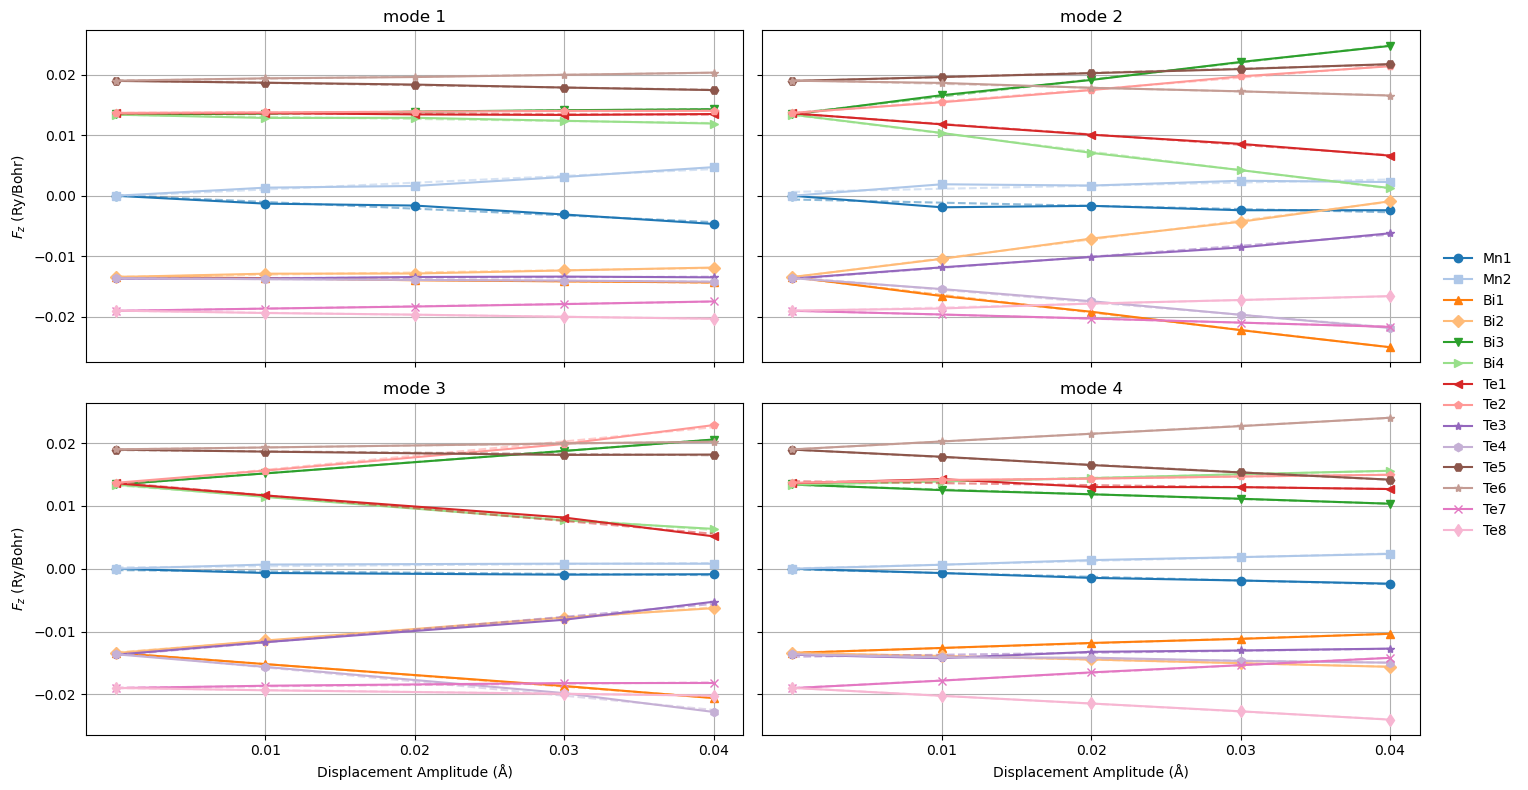

In [47]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(
    2, 2, 
    figsize=(15,8), 
    sharey='row', 
    sharex='col'
    )

cmap = plt.get_cmap('tab20')
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', 'H', '*', 'x', 'd']

# To collect legend handles/labels once
legend_handles = []
legend_labels = []
legend_collected = False

for ax, mode in zip(axs.flatten(), modes):
    amplitudes = np.array([amp for amp in total_forces[mode].keys()])

    F_x = [forces[:,0] for forces in total_forces[mode].values()]
    F_x = np.array(F_x)
    F_y = [forces[:,1] for forces in total_forces[mode].values()]
    F_y = np.array(F_y)
    F_z = [forces[:,2] for forces in total_forces[mode].values()]
    F_z = np.array(F_z)

    # sort by amplitudes
    sort_indices = np.argsort(amplitudes)
    amplitudes = amplitudes[sort_indices]
    F_x = F_x[sort_indices]
    F_y = F_y[sort_indices]
    F_z = F_z[sort_indices]

    slopes = []
    intercepts = []
    for i in range(F_z.shape[1]):
        coeffxs = np.polyfit(amplitudes, F_x[:, i], deg=1)  # coeffs[0]=slope, coeffs[1]=intercept
        coeffys = np.polyfit(amplitudes, F_y[:, i], deg=1)  # coeffs[0]=slope, coeffs[1]=intercept
        coeffsz = np.polyfit(amplitudes, F_z[:, i], deg=1)  # coeffs[0]=slope, coeffs[1]=intercept

        slopes.append(coeffsz[0])
        intercepts.append(coeffsz[1])

    for i in range(F_z.shape[1]):
        line = ax.plot(
            amplitudes, 
            F_z[:,i], 
            color=cmap(i),
            marker=markers[i % len(markers)], 
            label=f'{pos_id[i][0]}'
            )
        
        ax.plot(
            amplitudes,
            np.array(slopes[i]) * amplitudes + intercepts[i],
            color=cmap(i),
            linestyle='--',
            alpha=0.5
        )

        if not legend_collected:
            legend_handles.append(line[0])
            legend_labels.append(f'{pos_id[i][0]}')

    legend_collected = True

    ax.set_title(f'{mode}')
    ax.grid()


for ax in axs[-1, :]:
    ax.set_xlabel('Displacement Amplitude (Å)')
    ax.set_xticks([0.01, 0.02, 0.03, 0.04])
for ax in axs[:, 0]:
    ax.set_ylabel('$F_z$ (Ry/Bohr)')

fig.legend(
    legend_handles,
    legend_labels,
    loc='center right',
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)
fig.tight_layout()
fig.subplots_adjust(right=0.95)


## Dynamical Matrix

Let the raw forces be $F$. There are 21 degrees of freedom in the non-magnetic primitve, 7 atoms x 3 Cartesian directions. The forces can then be written as a 21 component matrix, indexed by $i \equiv (\text{atom index}, \text{Cartesian direction})$. The dynamical matrix we are interested in is then given by

$$
K_{\alpha \beta} = - \sum_{i} B_{i\alpha} \left( \frac{\partial f_i}{\partial Q_{\beta}} \right)
$$

or if we define $F_\alpha = \sum_i B^\alpha_i f_i$, then

$$
K_{\alpha \beta} = - \left( \frac{\partial F_{\alpha}}{\partial Q_{\beta}} \right)
$$

This is the projection of the force derivatives onto the symmetry modes $B^{\alpha}_i$ with displacement $Q_{\beta}$. Here, $\alpha, \beta$ index the symmetry modes, and $i$ indexes the atomic displacements. There are 4 symmetry modes in the T2- irrep, so $K$ is a 4x4 matrix.

In [48]:
B = np.zeros((4, 14, 3))
for mode_idx, mode in enumerate(modes):
    B[mode_idx,:,2] = np.array(
        [displacements[mode].get(pos_id[i][0], [0,0,0])[2] for i in range(len(pos_id))]
        )
    
B_flat = B.reshape(4, -1)
B_norms = np.linalg.norm(B_flat, axis=1)
B_unit_flat = B_flat / B_norms[:, np.newaxis]
B_unit = B_unit_flat.reshape(4, 14, 3)

In [49]:
sym_force_projections = {mode: {} for mode in modes}
dFdQ = np.zeros((4, 14, 3))

for mode_idx, mode in enumerate(modes):
    print(f"Processing {mode}...")
    
    valid_force_items = [
        (amp, forces) for amp, forces in total_forces[mode].items() if forces is not None
    ]
    if not valid_force_items:
        print(f"No valid force data for {mode}, skipping.")
        continue

    amplitudes = np.array([amp for amp, _ in valid_force_items])
    forces_stack = np.stack([forces for _, forces in valid_force_items], axis=0)

    # sort by amplitude so fits are deterministic
    sort_idx = np.argsort(amplitudes)
    amplitudes = amplitudes[sort_idx]
    forces_stack = forces_stack[sort_idx]

    axis_forces = {
        "x": forces_stack[:, :, 0],
        "y": forces_stack[:, :, 1],
        "z": forces_stack[:, :, 2],
    }

    for axis_idx, (axis_key, axis_array) in enumerate(axis_forces.items()):
        slopes = []
        intercepts = []
        for atom_idx in range(axis_array.shape[1]):
            coeffs = np.polyfit(amplitudes, axis_array[:, atom_idx], deg=1)
            slopes.append(coeffs[0])
            intercepts.append(coeffs[1])

        lsq_fits[mode][axis_key] = {
            "slope": np.array(slopes),
            "intercept": np.array(intercepts),
        }

    for amp, forces in zip(amplitudes, forces_stack):
        forces_vec = forces.reshape(-1)
        sym_force_projections[mode][amp] = -np.dot(B_unit_flat, forces_vec)
        # dFdQ[mode_idx, :, axis_idx] = slopes

Processing mode 1...
Processing mode 2...
Processing mode 3...
Processing mode 4...


In [50]:
def odd_slope_with_offset(amplitudes, values):
    """Remove intercept, mirror data, then fit slope with enforced odd symmetry."""
    amplitudes = np.asarray(amplitudes, float)
    values = np.asarray(values, float)

    # First pass: free linear fit to estimate intercept
    coeffs = np.polyfit(amplitudes, values, deg=1)
    slopes, intercepts = coeffs[0], coeffs[1]

    # Subtract intercepts so F(Q) goes through zero
    cleaned = values - intercepts

    # Mirror the cleaned data: (-Q, -F) + (Q, F)
    amps_full = np.concatenate([-amplitudes[::-1], amplitudes])
    vals_full = np.concatenate([-cleaned[::-1], cleaned])

    # Odd-sym slope (intercept fixed at zero)
    numer = np.dot(amps_full, vals_full)
    denom = np.dot(amps_full, amps_full)
    if denom == 0:
        raise ValueError("Need at least one non-zero amplitude.")
    return numer / denom

In [51]:
K = np.zeros((4,4))

for beta, mode in enumerate(modes):
    projected = sym_force_projections.get(mode, {})
    if not projected:
        print(f"No projected forces for {mode}, skipping K matrix calculation.")
        continue

    amps = np.array(sorted(projected.keys()))
    proj_stack = np.stack([projected[amp] for amp in amps], axis=0)

    for alpha in range(4):
        K[alpha, beta] = odd_slope_with_offset(amps, proj_stack[:, alpha])

print("K matrix:")
print(K)

K matrix:
[[ 0.15774576  0.07338496  0.02654493  0.08384646]
 [ 0.05866     0.5924897   0.35746205 -0.1306545 ]
 [ 0.0179789   0.37906405  0.42967205  0.06307985]
 [ 0.07111135 -0.1298641   0.05119525  0.24606565]]


In [52]:
for i in range(4):
    for j in range(i, 4):
        if i == j:
            continue
        diff = K[i,j] - K[j,i]
        diff = diff / np.amax(K)
        print(f"|(K[{i+1},{j+1}] - K[{j+1},{i+1}])|/max(K) = {abs(diff)}")

|(K[1,2] - K[2,1])|/max(K) = 0.02485267839272534
|(K[1,3] - K[3,1])|/max(K) = 0.0144576859093065
|(K[1,4] - K[4,1])|/max(K) = 0.021494229134111562
|(K[2,3] - K[3,2])|/max(K) = 0.03645970554424831
|(K[2,4] - K[4,2])|/max(K) = 0.0013340316295794251
|(K[3,4] - K[4,3])|/max(K) = 0.02005874532502426


## Generalized Eigenvalue Problem

Next we will solve the generalized eigenvalue problem

$$
K \mathbf{e}_\nu = \omega^2_\nu M \mathbf{e}_\nu
$$

where $M$ is the mass matrix, diagonal in the symmetry mode basis with entries given by the effective mass of each mode. The eigenvalues $\omega^2_\nu$ give the phonon frequencies squared, and the eigenvectors $\mathbf{e}$ give the phonon eigenmodes in the symmetry mode basis. The mass matrix is obtained by projecting the atomic masses onto the symmetry modes:

$$
M_{\alpha \beta} = \sum_{i} B^{\alpha}_i m_i B^{\beta}_i
$$

and is diagonal since the symmetry modes are orthogonal. 

In [48]:
from scipy.linalg import eig

In [49]:
# mass matrix
element_masses_amu = {"Mn": 54.938044, "Bi": 208.98040, "Te": 127.60}
get_elem = lambda label: ''.join(filter(str.isalpha, label))
masses = np.array([element_masses_amu[get_elem(sp)] for _, sp, _ in pos_id])
print(masses)
B_flat = B.reshape(4, 14*3)
# normalize B_flat
B_flat = B_flat / np.linalg.norm(B_flat, axis=1)[:, np.newaxis]

M = (B_flat * np.repeat(masses, 3)) @ B_flat.T
print("Mass matrix M:")
print(M)

# symmetrize K
K_sym = 0.5 * (K + K.T)
# K_sym = K

omega_sq, modes = eig(K_sym, M)  # generalize Hermitian eigenproblem

# ------ Convert omega_sq to frequencies in Hz ------
# K is in Ry/Bohr^2, M is in amu
# omega^2 has units of Ry/(Bohr^2 * amu)
# To convert to angular frequency in atomic units:

Ry = 2.1798723611035e-18  # Joules
Bohr = 5.29177210903e-11  # meters
amu = 1.66053906660e-27   # kg
hbar = 1.054571817e-34    # Joule seconds
factor = Ry / (Bohr**2 * amu) # conversion factor from Ry/(Bohr^2 * amu) to (rad/s)^2

omega_sq = omega_sq * factor
omega_si = np.sqrt(omega_sq)  # in rad/s

# Regular frequency (Hz) = angular frequency / (2pi)
freq_hz = omega_si / (2 * np.pi)

# Convert to THz
freq_thz = freq_hz * 1e-12

print("Vibrational frequencies (THz):")
for i, freq in enumerate(freq_thz):
    print(f"Mode {i+1}: {freq.real:.6f} THz")

[ 54.938044  54.938044 208.9804   208.9804   208.9804   208.9804
 127.6      127.6      127.6      127.6      127.6      127.6
 127.6      127.6     ]
Mass matrix M:
[[ 54.938044   0.         0.         0.      ]
 [  0.       208.9804     0.         0.      ]
 [  0.         0.       127.6        0.      ]
 [  0.         0.         0.       127.6     ]]
Vibrational frequencies (THz):
Mode 1: 8.012626 THz
Mode 2: 6.395627 THz
Mode 3: 4.760603 THz
Mode 4: 0.607507 THz


In [50]:
modes

array([[ 0.42815741, -0.88691347,  0.69065617,  0.37665626],
       [ 0.54772029,  0.14342465,  0.20471562, -0.51374022],
       [ 0.71869951,  0.05601147, -0.42315324,  0.55389278],
       [ 0.01243939, -0.43551876, -0.54956974, -0.53610058]])

Visualize the eigenmodes

Mass normalize the eigenvectors

$$
\tilde{e}_{\nu} = \frac{e_{\nu}}{\sqrt{e_{\nu}^T M e_{\nu}}}
$$

In [51]:
modes_massnorm = np.zeros_like(modes, dtype=float)

for nu in range(4):
    e = modes[:, nu]
    # normalization factor: sqrt(e^T M e)
    norm = np.sqrt(e.T @ (M @ e))
    modes_massnorm[:, nu] = e / norm

Normlize eigenvectors

In [52]:
modes_unit = np.zeros_like(modes, dtype=float)
for nu in range(4):
    e = modes[:, nu]
    # normalization factor: sqrt(e^T M e)
    norm = np.linalg.norm(e)
    modes_unit[:, nu] = e / norm

C:\Users\tbjco\AppData\Local\Temp\ipykernel_20936\3666360752.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(0, z, s=50, marker=markers[idx], c=cmap(idx), alpha=0.3)
C:\Users\tbjco\AppData\Local\Temp\ipykernel_20936\3666360752.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scat = ax.scatter(0, z_disp, s=50, marker=markers[idx], c=cmap(idx), alpha=1)


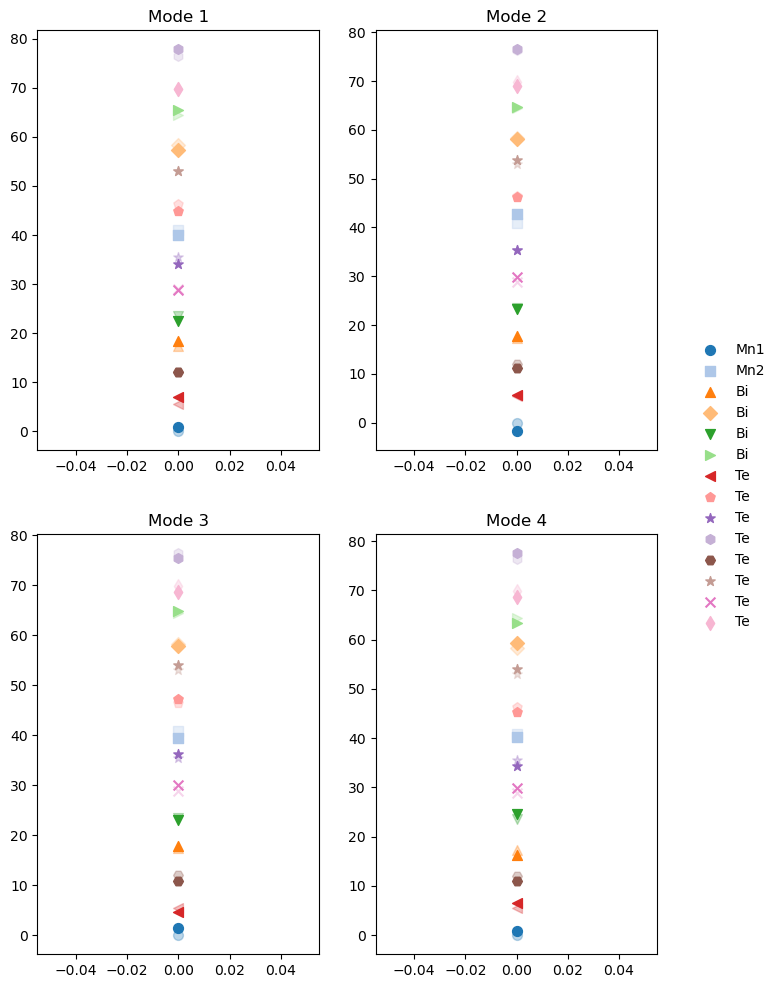

In [53]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(8,12))

nus = [0,1,2,3]
Q = 2
displacements = Q * np.tensordot(modes_unit, B, axes=(0, 0))   # shape (14, 3)

cmap = plt.get_cmap('tab20')

titles = ['Mode 1', 'Mode 2', 'Mode 3', 'Mode 4']

# To collect legend handles/labels once
legend_handles = []
legend_labels = []
legend_collected = False

for ax, nu in zip(axs.flatten(), nus):
    for idx, atom in enumerate(positions_ang):
        name = atom[0]
        position = atom[1]
        z = position[-1]

        # unperturbed
        ax.scatter(0, z, s=50, marker=markers[idx], c=cmap(idx), alpha=0.3)

        # perturbed
        z_disp = z + displacements[nu][idx][-1]

        scat = ax.scatter(0, z_disp, s=50, marker=markers[idx], c=cmap(idx), alpha=1)

        ax.set_title(titles[nu])

        if not legend_collected:
            legend_handles.append(scat)
            legend_labels.append(name)

    legend_collected = True
        

fig.legend(
    legend_handles,
    legend_labels,
    loc='center right',
    bbox_to_anchor=(1.05, 0.5),
    frameon=False
)

In [54]:
nu = 0  # choose one of the 4 T2- eigenmodes
e_nu = modes[:, nu]   # shape (4,)

# for a given scalar normal coordinate amplitude Q_amp:
Q_amp = 0.02  # angstrom
displacements = Q_amp * np.tensordot(modes_massnorm, B, axes=(0, 0))   # shape (14, 3)

Let $\theta(Q_\nu)$ be the axion angle as a function of the phonon mode amplitude $Q_\nu$, and $\nu$ labels the eigenmodes found above. The linear coupling between the phonon mode and the axion mode is given by the derivative 

$$
\frac{d \theta}{d Q_\nu} \bigg|_{Q_\nu = 0}
$$

The eigenmodes $\mathbf{e}$ give the relation between the symmetry mode displacements and the phonon mode displacements, allowing us to compute this derivative for each phonon mode. Each phonon mode is indexed by $\nu$

$$
e_\nu = (e_\nu^1, e_\nu^2, e_\nu^3, e_\nu^4)^T
$$

For a given mode $\nu$, a symmetry mode amplitude vector is:

$$
Q_\alpha^{(\nu)} = e_\nu^{\alpha} Q_\nu
$$

The atomic displacements are

$$
u_i^{(\nu)} = \sum_{\alpha} B_i^{\alpha} Q_\alpha^{(\nu)} = \sum_{\alpha} e_{\nu}^{\alpha} B_i^{\alpha} Q_\nu
$$

In [55]:
nu = 0  # choose one of the 4 T2- eigenmodes
e_nu = modes[:, nu]   # shape (4,)

# for a given scalar normal coordinate amplitude Q_amp:
Q_amp = 0.02  # angstrom
displacements = Q_amp * np.tensordot(modes_massnorm, B, axes=(0, 0))   # shape (14, 3)